Run Date: N/A
Process Type: Regional Picking
+-----+------------------------------------+---------------+------------------+
|     |        Source Barcode(name)        | Source Region | Destination Well |
+-----+------------------------------------+---------------+------------------+
|  0  |     QTray 1 A1-H6 Plate 4and2      |      A1       |        A1        |
| 87  |     QTray 1 A1-H6 Plate 4and2      |      C1       |        A1        |
| 67  |     QTray 1 A1-H6 Plate 4and2      |      B5       |       A10        |
| 79  |     QTray 1 A1-H6 Plate 4and2      |      B7       |       A12        |
|  8  |     QTray 1 A1-H6 Plate 4and2      |      A2       |        A2        |
| 95  |     QTray 1 A1-H6 Plate 4and2      |      C2       |        A2        |
| 16  |     QTray 1 A1-H6 Plate 4and2      |      A3       |        A3        |
| 103 |     QTray 1 A1-H6 Plate 4and2      |      C3       |        A3        |
| 24  |     QTray 1 A1-H6 Plate 4and2      |      A5       |        A4     

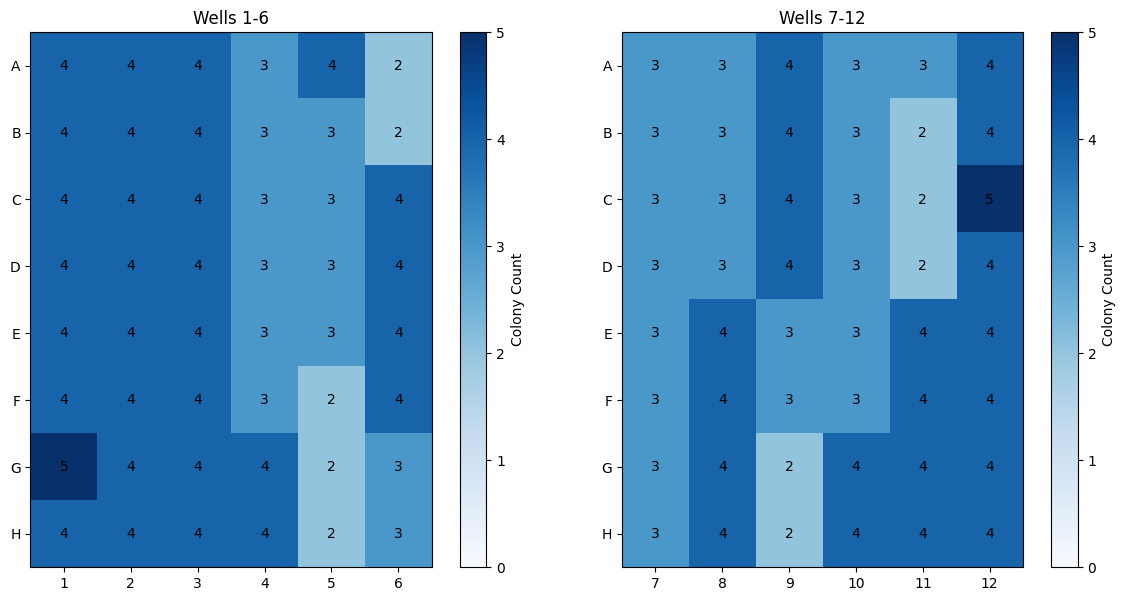

In [ ]:
import pandas as pd
import csv
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Read header information including Run Date and Process Type
header_info = {}
with open('/content/drive/MyDrive/Dataset/qtray_source2_dest3.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        if i < 11 and len(row) > 1:  # Check if the row has at least 2 columns
            # Extract Process Type from the second column
            if 'Process Type' in row[0]:
                header_info['Process Type'] = row[1].strip()
        else:
            break

# Read the CSV file starting from line 12 using pandas
data = pd.read_csv('/content/drive/MyDrive/Dataset/qtray_source2_dest3.csv', skiprows=10)

# Extract data from relevant columns (assuming they are consistent from line 12 onwards)
source_barcode = data['Source Barcode']
source_region = data['Source Region']
destination_well = data['Destination Well']

# Differentiate Plates Based on Source Barcode
plate_info = []
for barcode in source_barcode:
    if 'QTray 1' in barcode:
        plate_info.append('Plate 1')
    elif 'QTray 2' in barcode:
        match = re.search(r'\d+', barcode)
        if match:
            well_number = int(match.group())
            new_well_number = well_number + 6
            new_well = f"A{new_well_number}"
            plate_info.append(f'Plate 2 {new_well}')
        else:
            plate_info.append('Unknown Plate')
    else:
        plate_info.append('Unknown Plate')

# Add Plate Information to the DataFrame
data['Plate'] = plate_info

# Organize the data into a new DataFrame and sort it by Source Barcode and then by Destination Well
organized_data = pd.DataFrame({
    'Source Barcode(name)': source_barcode,
    'Source Region': source_region,
    'Destination Well': destination_well
}).sort_values(by=['Source Barcode(name)', 'Destination Well'])

# Display Run Date and Process Type
print(f"Run Date: {header_info.get('Run Date', 'N/A')}")
print(f"Process Type: {header_info.get('Process Type', 'N/A')}")

# Display the organized data as a formatted table
print(tabulate(organized_data, headers='keys', tablefmt='pretty'))

# Create 8x6 grid for the first set of wells
grid1 = np.zeros((8, 6))

# Create 8x6 grid for the second set of wells
grid2 = np.zeros((8, 6))

# Fill the grids with colony counts from the data
for i, row in organized_data.iterrows():
    dest_well = row['Destination Well']
    row_idx = ord(dest_well[0]) - ord('A')
    col_idx = int(dest_well[1:]) - 1
    if col_idx < 6:
        grid1[row_idx][col_idx] += 1
    else:
        grid2[row_idx][col_idx - 6] += 1

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first grid with annotations
im1 = axs[0].imshow(grid1, cmap='Blues', vmin=0, vmax=np.max([grid1, grid2]))  # Use a common color scale
axs[0].set_xticks(np.arange(6))
axs[0].set_yticks(np.arange(8))
axs[0].set_xticklabels(np.arange(1, 7))  # X-axis labels for the first grid
axs[0].set_yticklabels([chr(ord('A') + i) for i in range(8)])  # Y-axis labels for both grids
axs[0].set_title('Wells 1-6')

# Annotate the first grid with colony counts
for i in range(len(grid1)):
    for j in range(len(grid1[i])):
        axs[0].text(j, i, str(int(grid1[i, j])), ha='center', va='center', color='black')

# Plot the second grid with annotations
im2 = axs[1].imshow(grid2, cmap='Blues', vmin=0, vmax=np.max([grid1, grid2]))  # Use a common color scale
axs[1].set_xticks(np.arange(6))
axs[1].set_yticks(np.arange(8))
axs[1].set_xticklabels(np.arange(7, 13))  # X-axis labels for the second grid
axs[1].set_yticklabels([chr(ord('A') + i) for i in range(8)])  # Y-axis labels for both grids
axs[1].set_title('Wells 7-12')

# Annotate the second grid with colony counts
for i in range(len(grid2)):
    for j in range(len(grid2[i])):
        axs[1].text(j, i, str(int(grid2[i, j])), ha='center', va='center', color='black')

# Add colorbars
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar2 = fig.colorbar(im2, ax=axs[1])

# Set colorbar labels
cbar1.set_label('Colony Count')
cbar2.set_label('Colony Count')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()